In [256]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from keras.layers import BatchNormalization, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.neighbors import KDTree

In [257]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [258]:
batch_1 = unpickle('data_batch_1')
batch_2 = unpickle('data_batch_2')
batch_3 = unpickle('data_batch_3')
batch_4 = unpickle('data_batch_4')
batch_5 = unpickle('data_batch_5')
test_batch = unpickle('test_batch')

In [259]:
batch1_data = batch_1[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
batch2_data = batch_2[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
batch3_data = batch_3[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
batch4_data = batch_4[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
batch5_data = batch_5[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
test_data = test_batch[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)

batch1_labels = batch_1[b'labels']
batch2_labels = batch_2[b'labels']
batch3_labels = batch_3[b'labels']
batch4_labels = batch_4[b'labels']
batch5_labels = batch_5[b'labels']
test_labels_multi = test_batch[b'labels']
test_labels_multi = np.array(test_labels_multi)

train_data = np.concatenate((batch1_data, batch2_data, batch3_data, batch4_data, batch5_data), axis=0)
train_labels_multi = np.concatenate((batch1_labels, batch2_labels, batch3_labels, batch4_labels, batch5_labels), axis=0)

In [260]:
train_data_living = train_data[(train_labels_multi >= 2) & (train_labels_multi <= 7)]
train_labels_living = train_labels_multi[(train_labels_multi >= 2) & (train_labels_multi <= 7)]

test_data_living = test_data[(test_labels_multi >= 2) & (test_labels_multi <= 7)]
test_labels_living = test_labels_multi[(test_labels_multi >= 2) & (test_labels_multi <= 7)]

train_data_nonliving = train_data[(train_labels_multi == 0) | (train_labels_multi == 1) | (train_labels_multi == 8) | (train_labels_multi == 9)]
train_labels_nonliving = train_labels_multi[(train_labels_multi == 0) | (train_labels_multi == 1) | (train_labels_multi == 8) | (train_labels_multi == 9)]

test_data_nonliving = test_data[(test_labels_multi == 0) | (test_labels_multi == 1) | (test_labels_multi == 8) | (test_labels_multi == 9)]
test_labels_nonliving = test_labels_multi[(test_labels_multi == 0) | (test_labels_multi == 1) | (test_labels_multi == 8) | (test_labels_multi == 9)]

In [261]:
train_labels_binary = []
test_labels_binary = []
for label in train_labels_multi:
    if label == 0 or label == 1 or label == 8 or label == 9:
        train_labels_binary.append(1)

    elif label == 2 or label == 3 or label == 4 or label == 5 or label == 6 or label == 7:
        train_labels_binary.append(0)

for label in test_labels_multi:
    if label == 0 or label == 1 or label == 8 or label == 9:
        test_labels_binary.append(1)

    elif label == 2 or label == 3 or label == 4 or label == 5 or label == 6 or label == 7:
        test_labels_binary.append(0)

In [303]:
def label(num):
    if num == 0:
        return 'Airplane'
    elif num == 1:
        return 'Automobile'
    elif num == 2:
        return 'Bird'
    elif num == 3:
        return 'Cat'
    elif num == 4:
        return 'Deer'
    elif num == 5:
        return 'Dog'
    elif num == 6:
        return 'Frog'
    elif num == 7:
        return 'Horse'
    elif num == 8:
        return 'Ship'
    elif num == 9:
        return 'Truck'

def label_living(num):
    if num == 0:
        return 'Bird'
    elif num == 1:
        return 'Cat'
    elif num == 2:
        return 'Deer'
    elif num == 3:
        return 'Dog'
    elif num == 4:
        return 'Frog'
    elif num == 5:
        return 'Horse'

def label_nonliving(num):
    if num == 0:
        return 'Airplane'
    elif num == 1:
        return 'Automobile'
    elif num == 2:
        return 'Ship'
    elif num == 3:
        return 'Truck'

def label_binary(num):
    if num == 0:
        return 'Living'
    elif num == 1:
        return 'Non-Living'

The image is of Horse
The image is of None


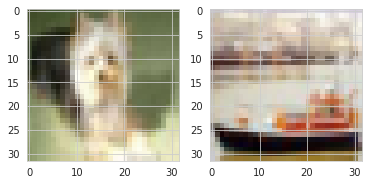

In [263]:
plt.subplot(1, 2, 1)
plt.imshow(train_data_living[111], cmap='binary')
print(f'The image is of {label_living(train_labels_living[111])}')

plt.subplot(1, 2, 2)
plt.imshow(test_data_nonliving[1521], cmap='binary')
print(f'The image is of {label_nonliving(test_labels_nonliving[1521])}')

In [264]:
train_labels_living = to_categorical(train_labels_living)
test_labels_living = to_categorical(test_labels_living)

train_labels_nonliving = to_categorical(train_labels_nonliving)
test_labels_nonliving = to_categorical(test_labels_nonliving)

train_labels_binary = to_categorical(train_labels_binary)
test_labels_binary = to_categorical(test_labels_binary)

In [265]:
train_labels_living = np.delete(train_labels_living, [0, 1], axis=1)
train_labels_living.shape

(30000, 6)

In [266]:
test_labels_living = np.delete(test_labels_living, [0, 1], axis=1)
test_labels_living.shape

(6000, 6)

In [267]:
train_labels_nonliving = np.delete(train_labels_nonliving, [2, 3, 4, 5, 6, 7], axis=1)
train_labels_nonliving.shape

(20000, 4)

In [268]:
test_labels_nonliving = np.delete(test_labels_nonliving, [2, 3, 4, 5, 6, 7], axis=1)
test_labels_nonliving.shape

(4000, 4)

In [158]:
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False)

In [159]:
train_data_living = datagen.flow(train_data_living, train_labels_living, batch_size=32)
train_data_nonliving = datagen.flow(train_data_nonliving, train_labels_nonliving, batch_size=32)

test_data_living = datagen.flow(test_data_living, test_labels_living, batch_size=32)
test_data_nonliving = datagen.flow(test_data_nonliving, test_labels_nonliving, batch_size=32)

test_data_binary = datagen.flow(test_data, test_labels_binary, batch_size=32)
train_data_binary = datagen.flow(train_data, train_labels_binary, batch_size=32)

In [165]:
cnn_binary = Sequential()
cnn_binary.add(Conv2D(32,kernel_size=(3,3), input_shape=[32, 32, 3], activation='relu'))
cnn_binary.add(MaxPooling2D(pool_size=(2,2)))
cnn_binary.add(BatchNormalization())

cnn_binary.add(Conv2D(64, kernel_size=(3,3), input_shape=[32,32,3], activation='relu'))
cnn_binary.add(MaxPooling2D(pool_size=(2,2)))
cnn_binary.add(BatchNormalization())

cnn_binary.add(Conv2D(128, kernel_size=(3,3), input_shape=[32,32,3], activation='relu'))
cnn_binary.add(MaxPooling2D(pool_size=(2,2)))
cnn_binary.add(BatchNormalization())

cnn_binary.add(Flatten())

cnn_binary.add(Dense(64, activation='relu'))
cnn_binary.add(Dense(2, activation='sigmoid'))

cnn_binary.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [166]:
accuracies_binary = cnn_binary.fit(train_data_binary, validation_data=test_data_binary, batch_size=128, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 45s 27ms/step - loss: 0.2942 - accuracy: 0.8782 - val_loss: 0.2986 - val_accuracy: 0.8794
Epoch 2/20
1563/1563 [==============================] - 47s 30ms/step - loss: 0.2387 - accuracy: 0.9044 - val_loss: 0.2314 - val_accuracy: 0.9060
Epoch 3/20
1563/1563 [==============================] - 41s 26ms/step - loss: 0.2139 - accuracy: 0.9156 - val_loss: 0.2043 - val_accuracy: 0.9191
Epoch 4/20
1563/1563 [==============================] - 43s 27ms/step - loss: 0.1967 - accuracy: 0.9214 - val_loss: 0.2965 - val_accuracy: 0.8746
Epoch 5/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.1800 - accuracy: 0.9293 - val_loss: 0.2095 - val_accuracy: 0.9160
Epoch 6/20
1563/1563 [==============================] - 41s 26ms/step - loss: 0.1694 - accuracy: 0.9331 - val_loss: 0.2969 - val_accuracy: 0.8683
Epoch 7/20
1563/1563 [==============================] - 42s 27ms/step - loss: 0.1622 - accuracy: 0.9356 - val_loss: 0.2115 -

In [161]:
cnn_living = Sequential()
cnn_living.add(Conv2D(32,kernel_size=(3,3), input_shape=[32, 32, 3], activation='relu'))
cnn_living.add(MaxPooling2D(pool_size=(2,2)))
cnn_living.add(BatchNormalization())

cnn_living.add(Conv2D(64, kernel_size=(3,3), input_shape=[32,32,3], activation='relu'))
cnn_living.add(MaxPooling2D(pool_size=(2,2)))
cnn_living.add(BatchNormalization())

cnn_living.add(Conv2D(128, kernel_size=(3,3), input_shape=[32,32,3], activation='relu'))
cnn_living.add(MaxPooling2D(pool_size=(2,2)))
cnn_living.add(BatchNormalization())

cnn_living.add(Flatten())

cnn_living.add(Dense(64, activation='relu'))
cnn_living.add(Dense(6, activation='softmax'))

cnn_living.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [162]:
accuracies_living = cnn_living.fit(train_data_living, validation_data=test_data_living, batch_size=128, epochs=20)

Epoch 1/20
938/938 [==============================] - 36s 29ms/step - loss: 1.3728 - accuracy: 0.4685 - val_loss: 1.3067 - val_accuracy: 0.5012
Epoch 2/20
938/938 [==============================] - 25s 27ms/step - loss: 1.1182 - accuracy: 0.5750 - val_loss: 1.1312 - val_accuracy: 0.5725
Epoch 3/20
938/938 [==============================] - 25s 27ms/step - loss: 1.0179 - accuracy: 0.6144 - val_loss: 1.1920 - val_accuracy: 0.5505
Epoch 4/20
938/938 [==============================] - 25s 27ms/step - loss: 0.9329 - accuracy: 0.6521 - val_loss: 1.0381 - val_accuracy: 0.6102
Epoch 5/20
938/938 [==============================] - 25s 26ms/step - loss: 0.8733 - accuracy: 0.6754 - val_loss: 1.1122 - val_accuracy: 0.5937
Epoch 6/20
938/938 [==============================] - 25s 27ms/step - loss: 0.8219 - accuracy: 0.6951 - val_loss: 0.9791 - val_accuracy: 0.6417
Epoch 7/20
938/938 [==============================] - 25s 27ms/step - loss: 0.7836 - accuracy: 0.7065 - val_loss: 0.9150 - val_accuracy:

In [163]:
cnn_nonliving = Sequential()
cnn_nonliving.add(Conv2D(32,kernel_size=(3,3), input_shape=[32, 32, 3], activation='relu'))
cnn_nonliving.add(MaxPooling2D(pool_size=(2,2)))
cnn_nonliving.add(BatchNormalization())

cnn_nonliving.add(Conv2D(64, kernel_size=(3,3), input_shape=[32,32,3], activation='relu'))
cnn_nonliving.add(MaxPooling2D(pool_size=(2,2)))
cnn_nonliving.add(BatchNormalization())

cnn_nonliving.add(Conv2D(128, kernel_size=(3,3), input_shape=[32,32,3], activation='relu'))
cnn_nonliving.add(MaxPooling2D(pool_size=(2,2)))
cnn_nonliving.add(BatchNormalization())

cnn_nonliving.add(Flatten())

cnn_nonliving.add(Dense(64, activation='relu'))
cnn_nonliving.add(Dense(4, activation='softmax'))

cnn_nonliving.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [164]:
accuracies_nonliving = cnn_nonliving.fit(train_data_nonliving, validation_data=test_data_nonliving, batch_size=128, epochs=20)

Epoch 1/20
625/625 [==============================] - 20s 27ms/step - loss: 0.8815 - accuracy: 0.6427 - val_loss: 0.8565 - val_accuracy: 0.6628
Epoch 2/20
625/625 [==============================] - 17s 27ms/step - loss: 0.6430 - accuracy: 0.7526 - val_loss: 0.6746 - val_accuracy: 0.7365
Epoch 3/20
625/625 [==============================] - 16s 26ms/step - loss: 0.5481 - accuracy: 0.7928 - val_loss: 0.6114 - val_accuracy: 0.7628
Epoch 4/20
625/625 [==============================] - 17s 27ms/step - loss: 0.4836 - accuracy: 0.8195 - val_loss: 0.6316 - val_accuracy: 0.7628
Epoch 5/20
625/625 [==============================] - 17s 26ms/step - loss: 0.4398 - accuracy: 0.8353 - val_loss: 0.5349 - val_accuracy: 0.8077
Epoch 6/20
625/625 [==============================] - 17s 27ms/step - loss: 0.4130 - accuracy: 0.8458 - val_loss: 0.7049 - val_accuracy: 0.7475
Epoch 7/20
625/625 [==============================] - 17s 28ms/step - loss: 0.3826 - accuracy: 0.8565 - val_loss: 0.5426 - val_accuracy:

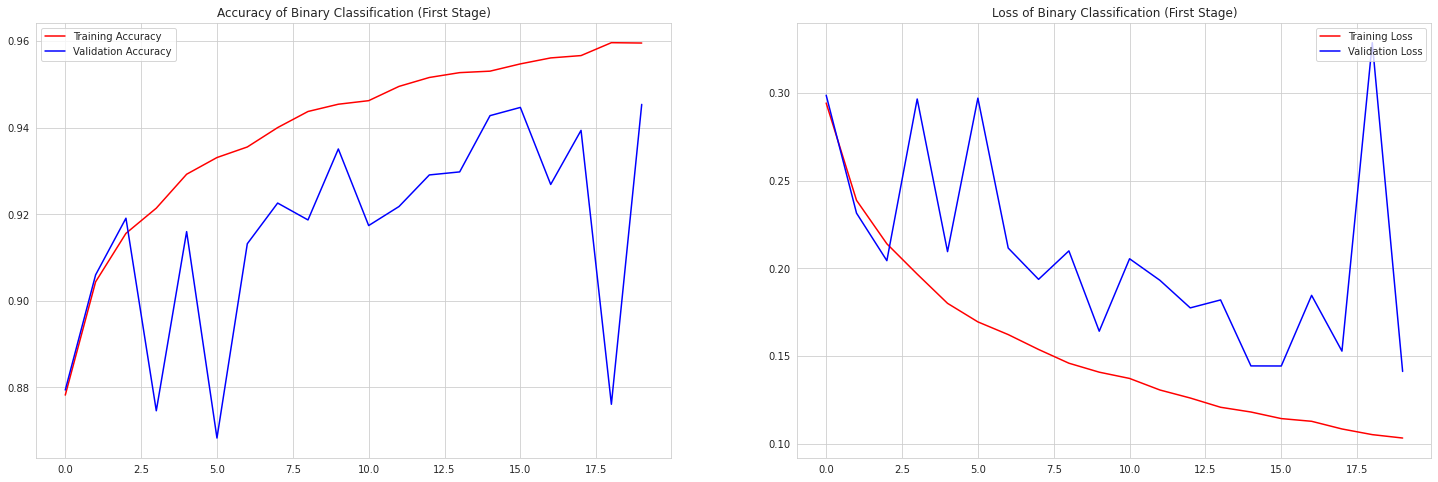

In [167]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.plot(range(20), accuracies_binary.history['accuracy'], "r", label="Training Accuracy")
plt.plot(range(20), accuracies_binary.history['val_accuracy'], "b", label = "Validation Accuracy")
plt.legend(loc="upper left")
plt.title("Accuracy of Binary Classification (First Stage)")

plt.subplot(1,2,2)
plt.plot(range(20), accuracies_binary.history['loss'], "r", label="Training Loss")
plt.plot(range(20), accuracies_binary.history['val_loss'], "b", label = "Validation Loss")
plt.legend(loc="upper right")
plt.title("Loss of Binary Classification (First Stage)")

plt.show()

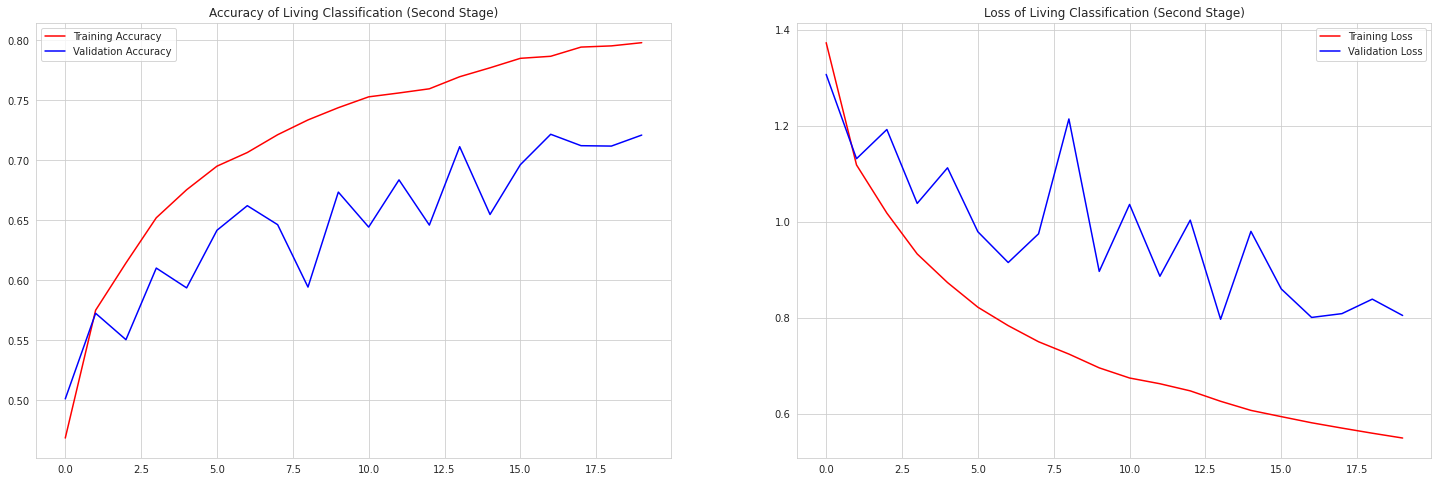

In [168]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.plot(range(20), accuracies_living.history['accuracy'], "r", label="Training Accuracy")
plt.plot(range(20), accuracies_living.history['val_accuracy'], "b", label = "Validation Accuracy")
plt.legend(loc="upper left")
plt.title("Accuracy of Living Classification (Second Stage)")

plt.subplot(1,2,2)
plt.plot(range(20), accuracies_living.history['loss'], "r", label="Training Loss")
plt.plot(range(20), accuracies_living.history['val_loss'], "b", label = "Validation Loss")
plt.legend(loc="upper right")
plt.title("Loss of Living Classification (Second Stage)")

plt.show()

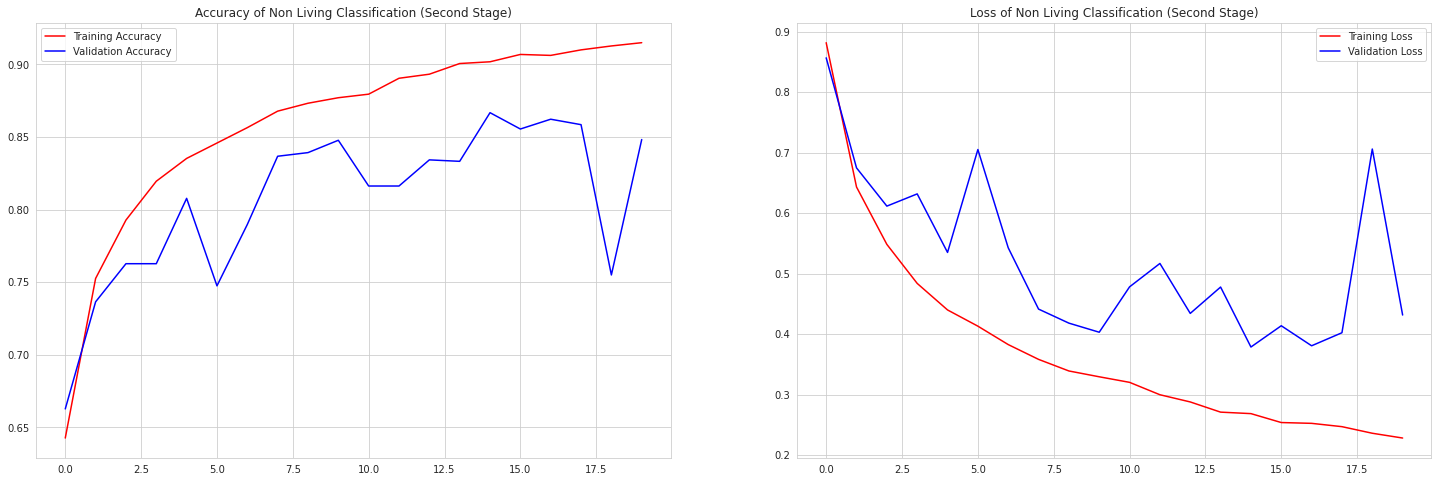

In [169]:
plt.figure(figsize=(25,8))

plt.subplot(1,2,1)
plt.plot(range(20), accuracies_nonliving.history['accuracy'], "r", label="Training Accuracy")
plt.plot(range(20), accuracies_nonliving.history['val_accuracy'], "b", label = "Validation Accuracy")
plt.legend(loc="upper left")
plt.title("Accuracy of Non Living Classification (Second Stage)")

plt.subplot(1,2,2)
plt.plot(range(20), accuracies_nonliving.history['loss'], "r", label="Training Loss")
plt.plot(range(20), accuracies_nonliving.history['val_loss'], "b", label = "Validation Loss")
plt.legend(loc="upper right")
plt.title("Loss of Non Living Classification (Second Stage)")

plt.show()

313/313 [==============================] - 8s 27ms/step
[[9.9994755e-01 5.5836234e-05]
 [9.4819283e-01 5.1141173e-02]
 [2.7020802e-04 9.9972671e-01]
 ...
 [3.5030134e-02 9.6497095e-01]
 [1.0406595e-01 8.9693403e-01]
 [3.2251543e-01 6.7687303e-01]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      5998
           1       0.40      0.40      0.40      4002

    accuracy                           0.52     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.52      0.52      0.52     10000



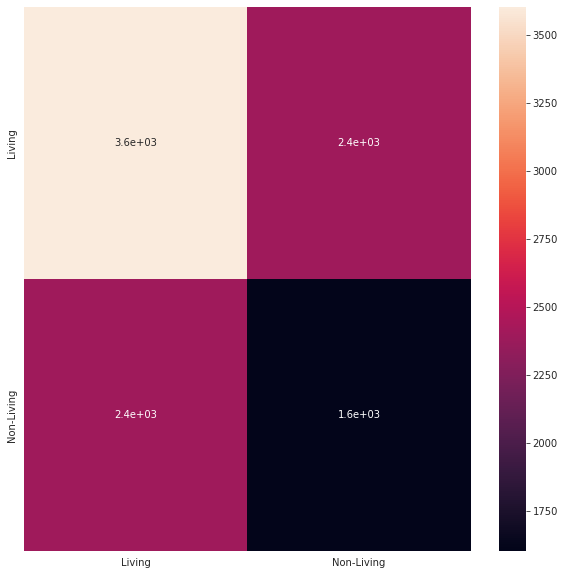

In [196]:
binary_predictions = cnn_binary.predict(test_data_binary)
binary_predictions_cm = binary_predictions.argmax(1)
target_labels_binary = np.argmax(test_labels_binary, 1)
class_names_binary = ["Living", "Non-Living"]

cm_binary = confusion_matrix(target_labels_binary, binary_predictions_cm)
plt.figure(figsize=(10, 10))
sns.heatmap(cm_binary, annot=True, xticklabels=class_names_binary, yticklabels=class_names_binary)
print(classification_report(binary_predictions_cm, target_labels_binary))

188/188 [==============================] - 4s 18ms/step
              precision    recall  f1-score   support

           0       0.11      0.16      0.13       725
           1       0.18      0.18      0.18       997
           2       0.18      0.16      0.17      1149
           3       0.18      0.18      0.18      1028
           4       0.20      0.16      0.18      1237
           5       0.15      0.18      0.16       864

    accuracy                           0.17      6000
   macro avg       0.17      0.17      0.17      6000
weighted avg       0.17      0.17      0.17      6000



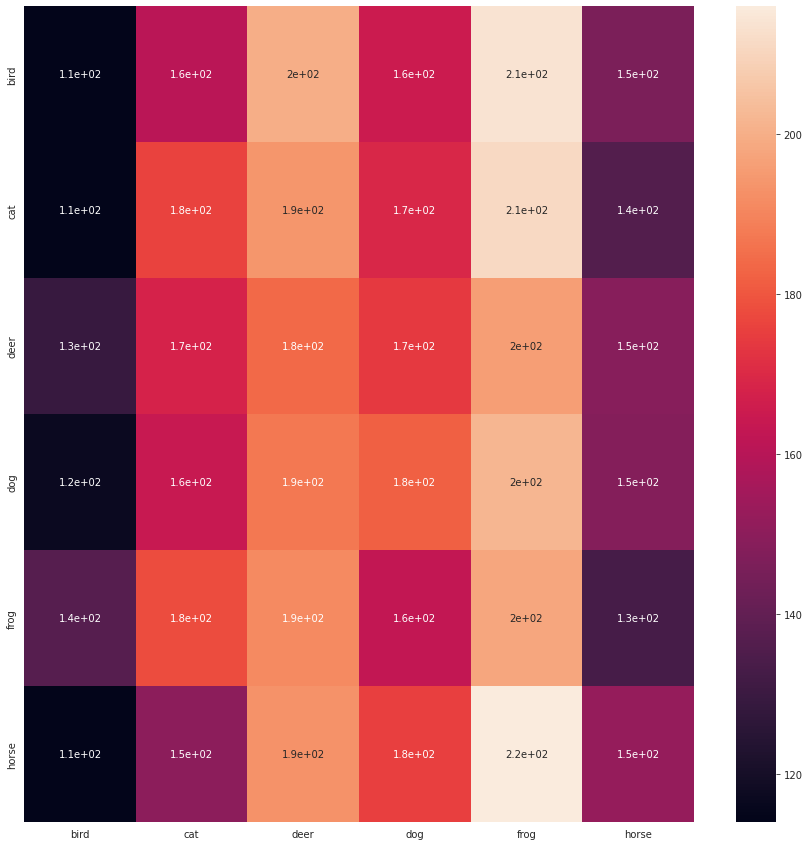

In [171]:
living_predictions = cnn_living.predict(test_data_living)
living_predictions_cm = living_predictions.argmax(1)
target_labels_living = np.argmax(test_labels_living, 1)
class_names_living = ["bird","cat","deer","dog","frog","horse"]

cm_living = confusion_matrix(target_labels_living, living_predictions_cm)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_living, annot=True, xticklabels=class_names_living, yticklabels=class_names_living)
print(classification_report(living_predictions_cm, target_labels_living))

125/125 [==============================] - 3s 19ms/step
              precision    recall  f1-score   support

           0       0.28      0.24      0.26      1184
           1       0.26      0.24      0.25      1066
           2       0.21      0.25      0.23       844
           3       0.22      0.24      0.23       906

    accuracy                           0.24      4000
   macro avg       0.24      0.25      0.24      4000
weighted avg       0.25      0.24      0.25      4000



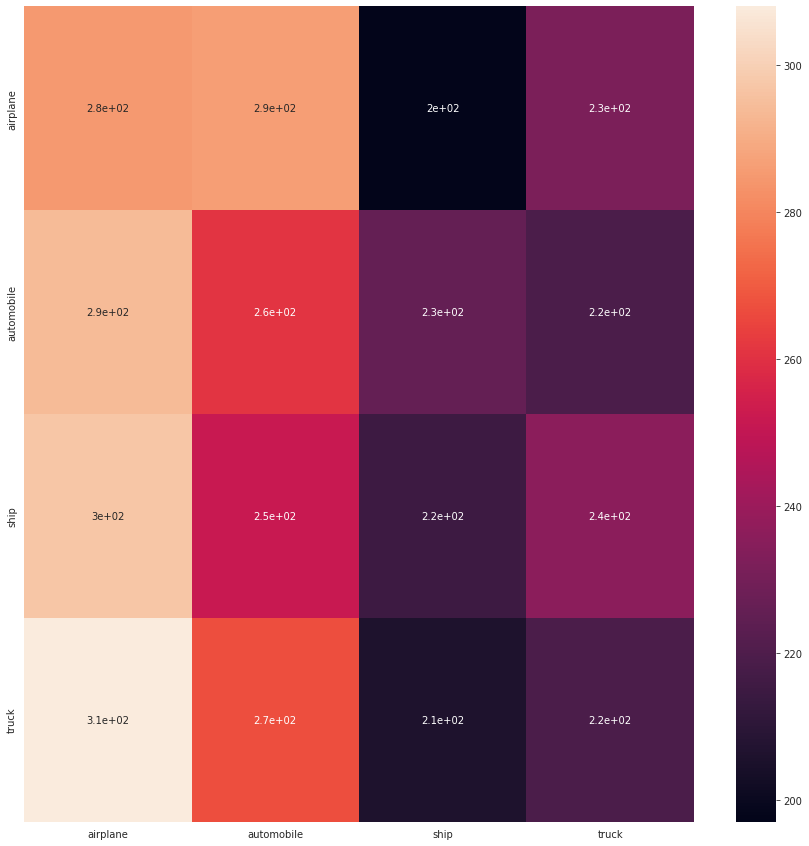

In [172]:
nonliving_predictions = cnn_nonliving.predict(test_data_nonliving)
nonliving_predictions_cm = nonliving_predictions.argmax(1)
target_labels_nonliving = np.argmax(test_labels_nonliving, 1)
class_names_nonliving = ["airplane","automobile","ship","truck"]

cm_nonliving = confusion_matrix(target_labels_nonliving, nonliving_predictions_cm)
plt.figure(figsize=(15, 15))
sns.heatmap(cm_nonliving, annot=True, xticklabels=class_names_nonliving, yticklabels=class_names_nonliving)
print(classification_report(nonliving_predictions_cm, target_labels_nonliving))

1/1 [==============================] - 0s 30ms/step
The Prediction of image is Living
1/1 [==============================] - 0s 29ms/step
The Prediction of image is Dog


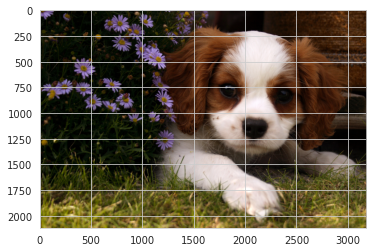

In [188]:
img = load_img('Cute_dog.jpg', target_size=(32,32))
raw_image = img_to_array(img)
test_image = np.expand_dims(raw_image,axis=0)
label = label_binary(np.argmax(cnn_binary.predict(test_image), 1))
print(f'The Prediction of image is {label}')
if label == 'Living':
  print(f'The Prediction of image is {label_living(np.argmax(cnn_living.predict(test_image), 1))}')
elif label == 'Non-Living':
  print(f'The Prediction of image is {label_nonliving(np.argmax(cnn_nonliving.predict(test_image), 1))}')
ti = plt.imread('Cute_dog.jpg')
plt.imshow(ti)

1/1 [==============================] - 0s 20ms/step
The Prediction of image is Non-Living
1/1 [==============================] - 0s 19ms/step
The Prediction of image is Truck


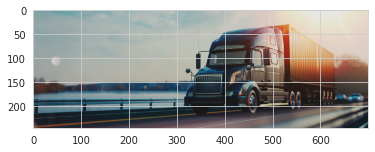

In [189]:
img = load_img('truck1.jpg', target_size=(32,32))
raw_image = img_to_array(img)
test_image = np.expand_dims(raw_image,axis=0)
label = label_binary(np.argmax(cnn_binary.predict(test_image), 1))
print(f'The Prediction of image is {label}')
if label == 'Living':
  print(f'The Prediction of image is {label_living(np.argmax(cnn_living.predict(test_image), 1))}')
elif label == 'Non-Living':
  print(f'The Prediction of image is {label_nonliving(np.argmax(cnn_nonliving.predict(test_image), 1))}')

ti = plt.imread('truck1.jpg')
plt.imshow(ti)

1/1 [==============================] - 0s 31ms/step
The Prediction of image is Living
1/1 [==============================] - 0s 27ms/step
The Prediction of image is Deer


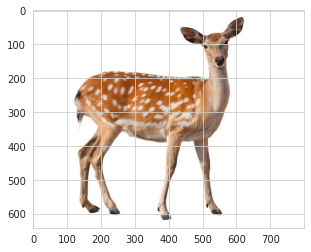

In [190]:
img = load_img('deer3.jpg', target_size=(32,32))
raw_image = img_to_array(img)
test_image = np.expand_dims(raw_image,axis=0)
label = label_binary(np.argmax(cnn_binary.predict(test_image), 1))
print(f'The Prediction of image is {label}')
if label == 'Living':
  print(f'The Prediction of image is {label_living(np.argmax(cnn_living.predict(test_image), 1))}')
elif label == 'Non-Living':
  print(f'The Prediction of image is {label_nonliving(np.argmax(cnn_nonliving.predict(test_image), 1))}')

ti = plt.imread('deer3.jpg')
plt.imshow(ti)

1/1 [==============================] - 0s 22ms/step
The Prediction of image is Non-Living
1/1 [==============================] - 0s 21ms/step
The Prediction of image is Airplane


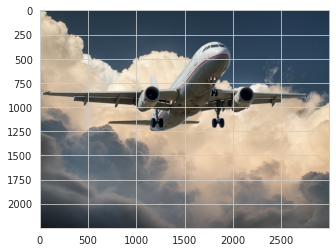

In [191]:
img = load_img('air.jpg', target_size=(32,32))
raw_image = img_to_array(img)
test_image = np.expand_dims(raw_image,axis=0)

label = label_binary(np.argmax(cnn_binary.predict(test_image), 1))
print(f'The Prediction of image is {label}')
if label == 'Living':
  print(f'The Prediction of image is {label_living(np.argmax(cnn_living.predict(test_image), 1))}')
elif label == 'Non-Living':
  print(f'The Prediction of image is {label_nonliving(np.argmax(cnn_nonliving.predict(test_image), 1))}')

ti = plt.imread('air.jpg')
plt.imshow(ti)

1/1 [==============================] - 0s 19ms/step
The Prediction of image is Non-Living
1/1 [==============================] - 0s 19ms/step
The Prediction of image is Airplane


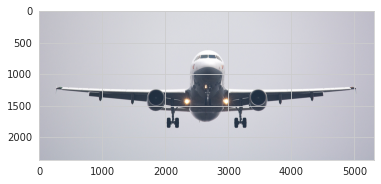

In [192]:
img = load_img('air2.jpg', target_size=(32,32))
raw_image = img_to_array(img)
test_image = np.expand_dims(raw_image,axis=0)

label = label_binary(np.argmax(cnn_binary.predict(test_image), 1))
print(f'The Prediction of image is {label}')
if label == 'Living':
  print(f'The Prediction of image is {label_living(np.argmax(cnn_living.predict(test_image), 1))}')
elif label == 'Non-Living':
  print(f'The Prediction of image is {label_nonliving(np.argmax(cnn_nonliving.predict(test_image), 1))}')

ti = plt.imread('air2.jpg')
plt.imshow(ti)

------------------------------------------------------------------------------Reverse Image Search------------------------------------------------------------------------------



In [291]:
batch1_data = batch_1[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
batch2_data = batch_2[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
batch3_data = batch_3[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
batch4_data = batch_4[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
batch5_data = batch_5[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)
batch6_data = test_batch[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)

batch1_labels = batch_1[b'labels']
batch2_labels = batch_2[b'labels']
batch3_labels = batch_3[b'labels']
batch4_labels = batch_4[b'labels']
batch5_labels = batch_5[b'labels']
batch6_labels = test_batch[b'labels']

train_data = np.concatenate((batch1_data, batch2_data, batch3_data, batch4_data, batch5_data, batch6_data), axis=0)
train_labels = np.concatenate((batch1_labels, batch2_labels, batch3_labels, batch4_labels, batch5_labels, batch6_labels), axis=0)

In [292]:
train_data = train_data.astype('float32') / 255
train_labels = to_categorical(train_labels)

In [277]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,kernel_size=(3,3), input_shape=[32, 32, 3], activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(64, kernel_size=(3,3), input_shape=[32,32,3], activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(BatchNormalization())

cnn_model.add(Conv2D(128, kernel_size=(3,3), input_shape=[32,32,3], activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(BatchNormalization())

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [297]:
accuracies = cnn_model.fit(train_data, train_labels, batch_size=128, epochs=20)

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.3895 - accuracy: 0.8648
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3229 - accuracy: 0.8880
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2815 - accuracy: 0.9031
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2475 - accuracy: 0.9148
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2163 - accuracy: 0.9270
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1866 - accuracy: 0.9366
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1593 - accuracy: 0.9459
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1314 - accuracy: 0.9567
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1118 - accuracy: 0.9633
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0927 - accuracy: 0.9700

In [298]:
features = cnn_model.predict(train_data)

tree = KDTree(features.reshape(features.shape[0], -1), leaf_size=40)

1875/1875 [==============================] - 5s 3ms/step


In [301]:
query_img_path = 'car.jpg'
query_img = load_img(query_img_path, target_size=(32, 32))
query_img = img_to_array(query_img)
query_img = np.expand_dims(query_img, axis=0)
query_img = query_img.astype('float32') / 255
query_features = cnn_model.predict(query_img)
dist, ind = tree.query(query_features.reshape(query_features.shape[0], -1), k=10)

1/1 [==============================] - 0s 136ms/step


Similar image 1: label=Automobile


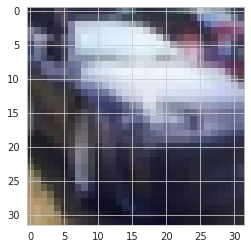

Similar image 2: label=Automobile


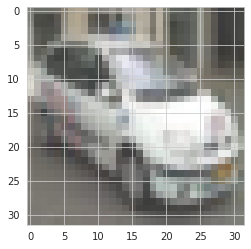

Similar image 3: label=Automobile


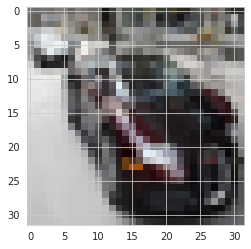

Similar image 4: label=Automobile


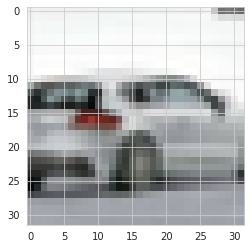

Similar image 5: label=Automobile


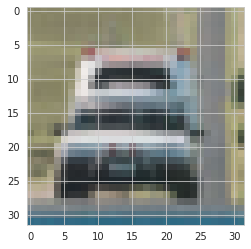

Similar image 6: label=Automobile


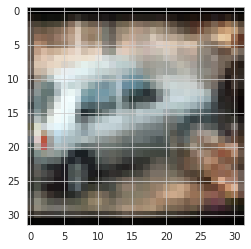

Similar image 7: label=Automobile


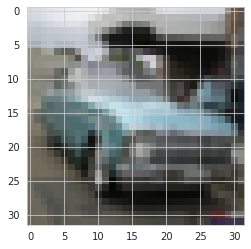

Similar image 8: label=Automobile


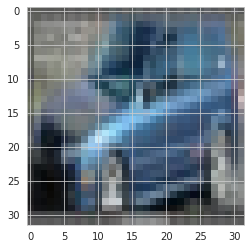

Similar image 9: label=Automobile


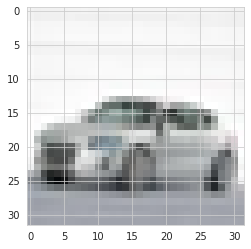

Similar image 10: label=Automobile


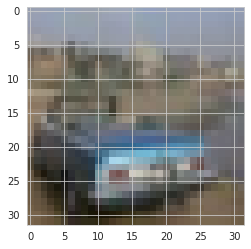

In [305]:
for i in range(ind.shape[1]):
    sim_img = train_data[ind[0,i],:,:,:]
    sim_label = np.argmax(train_labels[ind[0,i]])
    print("Similar image %d: label=%s" % (i+1, label(sim_label)))
    plt.imshow(sim_img)
    plt.show()